In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

data = {
    "Engine_Size": [1.2,1.5,1.8,2.0,2.2,1.3,1.6,2.4,2.0,1.4,1.7,2.5,1.8,2.2,1.5],
    "Mileage": [90,70,60,50,40,85,65,30,45,80,55,25,50,35,75],
    "Age": [8,6,5,4,3,7,6,2,4,7,5,1,3,2,6],
    "Horsepower": [80,95,110,130,150,85,100,180,140,90,115,200,125,160,105],
    "Price": [3.5,5,6,8,10,4,5.5,14,9,4.5,6.5,16,8.5,12,5.2]
}

df = pd.DataFrame(data)

print("Dataset:")
print(df)

Dataset:
    Engine_Size  Mileage  Age  Horsepower  Price
0           1.2       90    8          80    3.5
1           1.5       70    6          95    5.0
2           1.8       60    5         110    6.0
3           2.0       50    4         130    8.0
4           2.2       40    3         150   10.0
5           1.3       85    7          85    4.0
6           1.6       65    6         100    5.5
7           2.4       30    2         180   14.0
8           2.0       45    4         140    9.0
9           1.4       80    7          90    4.5
10          1.7       55    5         115    6.5
11          2.5       25    1         200   16.0
12          1.8       50    3         125    8.5
13          2.2       35    2         160   12.0
14          1.5       75    6         105    5.2


In [2]:
print("\nShape of dataset:", df.shape)
print("\nSummary statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())


Shape of dataset: (15, 5)

Summary statistics:
       Engine_Size    Mileage        Age  Horsepower      Price
count    15.000000  15.000000  15.000000   15.000000  15.000000
mean      1.806667  57.000000   4.600000  124.333333   7.846667
std       0.400832  20.248457   2.097618   35.700474   3.767695
min       1.200000  25.000000   1.000000   80.000000   3.500000
25%       1.500000  42.500000   3.000000   97.500000   5.100000
50%       1.800000  55.000000   5.000000  115.000000   6.500000
75%       2.100000  72.500000   6.000000  145.000000   9.500000
max       2.500000  90.000000   8.000000  200.000000  16.000000

Missing values:
Engine_Size    0
Mileage        0
Age            0
Horsepower     0
Price          0
dtype: int64


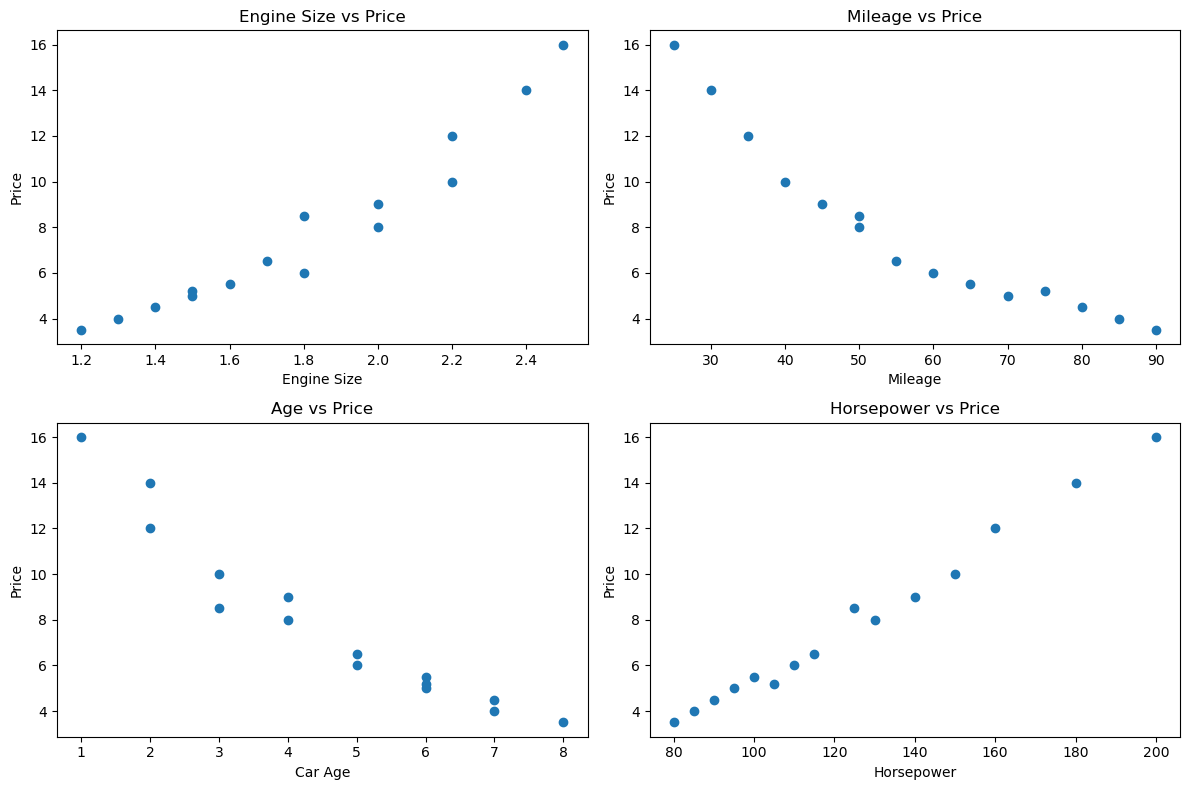

In [3]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(df["Engine_Size"], df["Price"])
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs Price")

plt.subplot(2,2,2)
plt.scatter(df["Mileage"], df["Price"])
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs Price")

plt.subplot(2,2,3)
plt.scatter(df["Age"], df["Price"])
plt.xlabel("Car Age")
plt.ylabel("Price")
plt.title("Age vs Price")

plt.subplot(2,2,4)
plt.scatter(df["Horsepower"], df["Price"])
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Horsepower vs Price")

plt.tight_layout()
plt.show()

In [4]:
X = df[["Engine_Size", "Mileage", "Age", "Horsepower"]]
y = df["Price"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-2.55064850e+00 -3.57689276e-04 -3.96609428e-01  1.12434570e-01]
Intercept: 0.24841323195327103


In [15]:
y_pred = model.predict(X_test)
# y_pred = y_pred.round(2)
print("\nActual vs Predicted:")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")


Actual vs Predicted:
Actual: 4.50, Predicted: 3.99
Actual: 16.00, Predicted: 15.95
Actual: 3.50, Predicted: 2.98


In [16]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Absolute Error: 0.3592589480272612
R2 Score: 0.9944693487104425


In [17]:
new_car = pd.DataFrame({
    "Engine_Size": [1.8],
    "Mileage": [60],
    "Age": [4],
    "Horsepower": [120]
})

predicted_price = model.predict(new_car)
print("\nPredicted Car Price:", predicted_price[0], "lakhs")


Predicted Car Price: 7.541495317353609 lakhs
